In [2]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [113]:
class heatmaps:


    #The class initializes the dataframes of all three datasets and list of dfs for easy access

    def __init__(self):
        self.df_inundacion = gpd.read_file('/Users/drossi/DevDownloads/atlas_de_riesgo_inundaciones/atlas_de_riesgo_inundaciones.shp')
        self.df_precipitacion = gpd.read_file('/Users/drossi/DevDownloads/atlas_de_riesgo_precipitacion/atlas_de_riesgo_precipitacion.shp')
        self.df_granizo =  gpd.read_file('/Users/drossi/DevDownloads/atlas_de_riesgo_granizo/atlas_de_riesgo_granizo.shp')
        self.df_cdmx = gpd.read_file("/Users/drossi/DevDownloads/alcaldias/alcaldias.shp")
        self.lista_df = [self.df_inundacion, self.df_precipitacion, self.df_granizo]
        self.lista = ["Flooding", "Precipitation", "Hail"]
        self.alcaldias = ["Álvaro Obregón", "Azcapotzalco", "Benito Juárez", "Coyoacán", "Cuajimalpa de Morelos", "Cuauhtémoc", "Gustavo A. Madero", "Iztacalco", "Iztapalapa", "La Magdalena Contreras", "Miguel Hidalgo", "Milpa Alta", "Tláhuac", "Tlalpan", "Venustiano Carranza" , "Xochimilco"]
        self.warnings = ["very low", "low", "moderate", "high", "very high"]
        

    #Simple plot function

    
    def plot(self, num):

        df = self.lista_df[num]


        # Create a larger figure
        fig, ax = plt.subplots(figsize=(12, 12))

        # Plot the df data
        df.plot(column="int2", legend=True, legend_kwds={"label": self.lista[num]+" risk", "orientation": "vertical", "location": "right"}, ax=ax)

        # Plot the target point

        self.df_cdmx.boundary.plot(ax=ax, color="black", linewidth=1)

        #Falta modificar título
        titulo = self.lista[num] + " risk graph in Mexico City"
        ax.axis('off')
        # Set the title
        plt.title(titulo, fontsize=16, fontweight='bold')

        # Show the plot
        plt.show()



    def position(self, long, lat, num):


        def arreglo_alcaldia(alcaldia_mal):
            for alcaldia in self.alcaldias:
                if alcaldia[:4] == alcaldia_mal:
                    return alcaldia

        df = self.lista_df[num]

        

        # Create a GeoDataFrame containing the target point
        target_coordinate = Point(long, lat)
        result = df[df.contains(target_coordinate)]

        try: 
            alcaldia = arreglo_alcaldia(str(result['alcaldi'].iloc[0][0:4]))
        except:
            print("Error in map generation, enter valid coordinate")
        
        nivel_riesgo = self.warnings[result['int2'].iloc[0]-1]


        target_gdf = gpd.GeoDataFrame(geometry=[target_coordinate], crs=df.crs)




        titulo = "The risk of " + self.lista[num]  + " in " + alcaldia + " is " + nivel_riesgo
        
        # Create a larger figure
        fig, ax = plt.subplots(figsize=(12, 12))

        # Plot df data
        #Falta agregar un mejor tamaño de subtitulo
        df.plot(column="int2", legend=True, legend_kwds={"label": self.lista[num]+" risk", "orientation": "vertical", "location": "right"}, ax=ax)
    
    



        self.df_cdmx.boundary.plot(ax=ax, color="black", linewidth=1)

        # Plot the target point
        target_gdf.plot(ax=ax, markersize=100, color='red', marker='*', label='Your Label', zorder=3)

        ax.axis('off')

  
        plt.title(titulo, fontsize=16, fontweight='bold')

        # Show the plot
        plt.show()





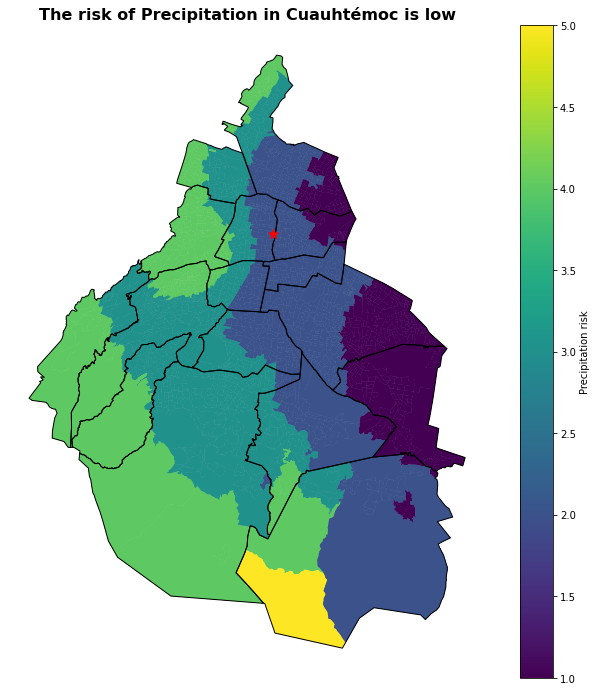

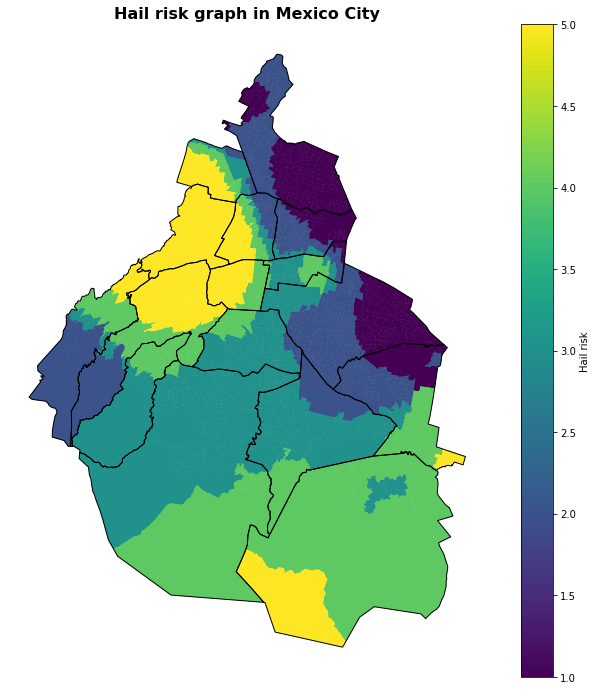

In [115]:
prueba = heatmaps()

prueba_coordenadas_v = [-99.1276600, -99.16174, -99.02277]
prueba_coordenadas_c = [19.4284700, 19.3467, 19.19174]

pos = 0

prueba.position(prueba_coordenadas_v[pos],prueba_coordenadas_c[pos],1)

prueba.plot(2)
#prueba.plot(2)

